In [29]:
import pydoc

print(pydoc.locate("iris.ActiveContourSegmentation"))  

# from iris.nodes.segmentation.active_contour_dft_segmentation import ActiveContourDFTSegmentation
# help(ActiveContourDFTSegmentation)


<class 'iris.nodes.segmentation.active_contour_dft_segmentation.ActiveContourDFTSegmentation'>


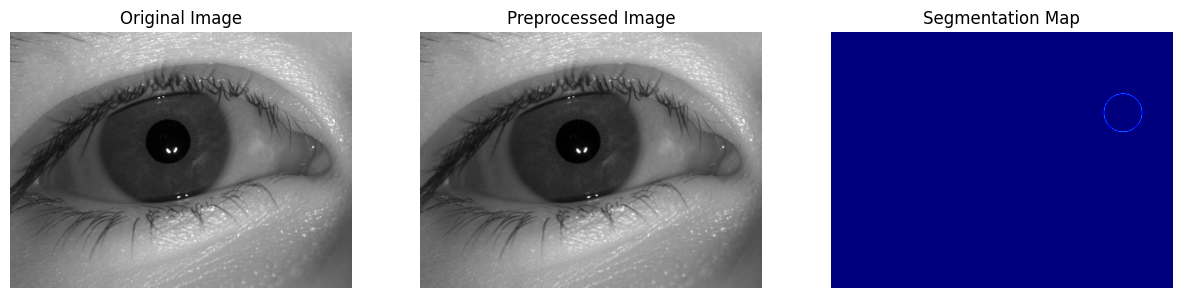

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from iris.nodes.segmentation.active_contour_dft_segmentation import ActiveContourDFTSegmentation

# Load a sample grayscale image
image_path = "eye.png"  # Change to your test image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if image is None:
    raise ValueError("Image not found! Check the file path.")

# Convert grayscale to BGR (3-channel) to avoid errors
image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Initialize the segmentation class
segmentation = ActiveContourDFTSegmentation()

# Step 1: Preprocess the image
preprocessed = segmentation.preprocess(image_bgr)  # Pass BGR image

# Step 2: Detect initial boundary using Hough Transform
x, y, r = segmentation.detect_initial_boundary(preprocessed)

# Step 3: Refine boundary using Active Contour
refined_contour = segmentation.refine_boundary_active_contour(preprocessed, x, y, r)

# Step 4: Generate segmentation map
segmap = segmentation.generate_segmentation_map(preprocessed, refined_contour)

# Step 5: Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(preprocessed, cmap="gray")
axes[1].set_title("Preprocessed Image")
axes[1].axis("off")

axes[2].imshow(segmap, cmap="jet")
axes[2].set_title("Segmentation Map")
axes[2].axis("off")

plt.show()


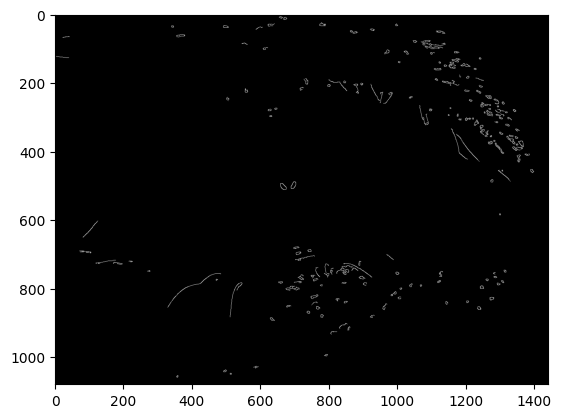

In [31]:
edges = cv2.Canny(preprocessed, 50, 150)
plt.imshow(edges, cmap="gray")
plt.show()


{'metadata': {'pipeline_name': 'iris_pipeline', 'iris_version': '1.2.0'}, 'pipeline': [{'name': 'segmentation', 'algorithm': {'class_name': 'iris.nodes.segmentation.active_contour_dft_segmentation.ActiveContourDFTSegmentation', 'params': {}}, 'inputs': [{'name': 'image', 'source_node': 'input'}], 'callbacks': None}, {'name': 'segmentation_binarization', 'algorithm': {'class_name': 'iris.MultilabelSegmentationBinarization', 'params': {}}, 'inputs': [{'name': 'segmentation_map', 'source_node': 'segmentation'}], 'callbacks': None}, {'name': 'vectorization', 'algorithm': {'class_name': 'iris.ContouringAlgorithm', 'params': {}}, 'inputs': [{'name': 'geometry_mask', 'source_node': 'segmentation_binarization', 'index': 0}], 'callbacks': None}, {'name': 'specular_reflection_detection', 'algorithm': {'class_name': 'iris.SpecularReflectionDetection', 'params': {}}, 'inputs': [{'name': 'ir_image', 'source_node': 'input'}], 'callbacks': None}, {'name': 'interpolation', 'algorithm': {'class_name': 

AttributeError: 'NoneType' object has no attribute 'predictions'

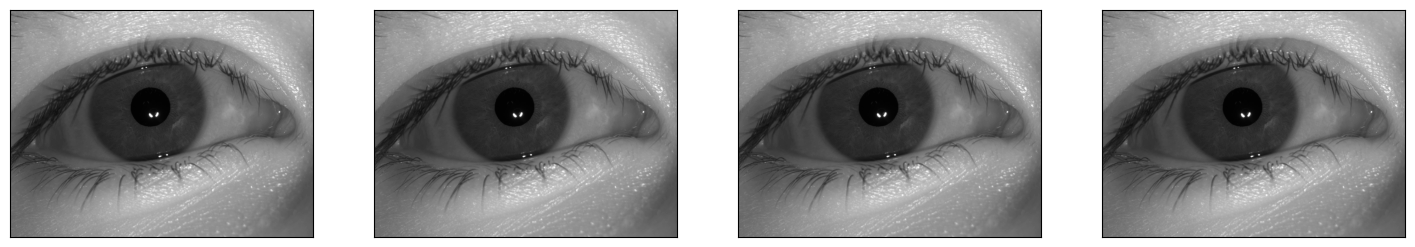

In [32]:
import cv2
import iris
import matplotlib.pyplot as plt

import yaml

with open("active_contour.yaml", "r") as file:
    config_data = yaml.safe_load(file)

print(config_data)  # Check if the config is correctly loaded

# 1. Create IRISPipeline object
# iris_pipeline = iris.IRISPipeline(config="active_contour.yaml")
iris_pipeline = iris.IRISPipeline(config=config_data)

# 2. Load IR image of an eye
img_pixels = cv2.imread("eye.png", cv2.IMREAD_GRAYSCALE)

# 3. Perform inference
# Options for the `eye_side` argument are: ["left", "right"]
output = iris_pipeline(img_data=img_pixels, eye_side="left")

# 4. Print iris pipeline
for i in iris_pipeline.params.pipeline:
    print(i)

# 5. Display the output
iris_visualizer = iris.visualisation.IRISVisualizer()
canvas = iris_visualizer.plot_segmentation_map(
    ir_image=iris.IRImage(img_data=img_pixels, eye_side="right"),
    segmap=iris_pipeline.call_trace['segmentation'],
)
plt.show()


